In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [6]:
df.shape

(255, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [10]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [12]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [14]:
df_clean = df.copy()

In [16]:
df_clean['state'] = df_clean['state'].replace('-1', 'Unknown')
df_clean['region'] = df_clean['region'].replace('-1', 'Unknown')
df_clean['flavor_profile'] = df_clean['flavor_profile'].replace('-1', 'Unknown')

In [18]:
df_clean['prep_time'] = df_clean['prep_time'].replace(-1, np.nan)
df_clean['cook_time'] = df_clean['cook_time'].replace(-1, np.nan)

In [20]:
df_clean.isna().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile     0
course             0
state              0
region             1
dtype: int64

In [22]:
df_clean['prep_time'] = df_clean['prep_time'].fillna(df_clean['prep_time'].median())
df_clean['cook_time'] = df_clean['cook_time'].fillna(df_clean['cook_time'].median())
df_clean.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [24]:
df_clean['region'] = df_clean['region'].fillna('Unknown')

In [26]:
df_clean.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [28]:
df_clean[df_clean['prep_time'] < 30].sort_values('prep_time')

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
45,Mysore pak,"Besan flour, semolina, mung bean, jaggery, coc...",vegetarian,5.0,20.0,sweet,dessert,Karnataka,South
147,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5.0,5.0,spicy,snack,Kerala,South
214,Khichu,"Rice flour, sesame seeds, baking soda, peanut oil",vegetarian,5.0,10.0,spicy,snack,Gujarat,West
225,Alu Pitika,"Potatoes, mustard oil, fish, green chillies",non vegetarian,5.0,20.0,spicy,main course,Assam,North East
49,Pongal,"Rice, jaggery, cashews, ghee",vegetarian,5.0,20.0,sweet,dessert,Tamil Nadu,South
...,...,...,...,...,...,...,...,...,...
100,Makki di roti sarson da saag,"Palak, makki atta, mustard green, garam masala...",vegetarian,25.0,30.0,spicy,main course,Punjab,North
209,Undhiyu,"Sweet potato, surti papdi, baby potatoes, valo...",vegetarian,25.0,60.0,spicy,main course,Gujarat,West
105,Navrattan korma,"Green beans, potatoes, khus khus, low fat, gar...",vegetarian,25.0,40.0,spicy,main course,Uttar Pradesh,North
208,Thalipeeth,"Whole wheat flour, rice flour, pearl millet fl...",vegetarian,25.0,30.0,spicy,main course,Maharashtra,West


In [30]:
df_clean[(df_clean['diet'] == 'vegetarian') & (df_clean['flavor_profile'] == 'spicy')]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
68,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10.0,20.0,spicy,main course,Punjab,North
69,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5.0,20.0,spicy,main course,Punjab,North
70,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5.0,40.0,spicy,main course,Punjab,North
72,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10.0,40.0,spicy,main course,Punjab,North
73,Bhatura,"Chole, rava, yogurt, plain flour, baking soda",vegetarian,20.0,20.0,spicy,main course,Punjab,North
...,...,...,...,...,...,...,...,...,...
217,Khaman,"Yogurt, fresh coconut, sesame seeds, semolina,...",vegetarian,10.0,20.0,spicy,snack,Gujarat,West
218,Turiya Patra Vatana sabji,"Ridge gourd, baking soda, sugar, grated coconu...",vegetarian,35.0,40.0,spicy,main course,Gujarat,West
230,Bora Sawul,"Biryani masala, mixed vegetables, yellow moong...",vegetarian,10.0,30.0,spicy,main course,Assam,North East
238,Khorisa,"Fermented bamboo shoot, potato, ginger, green,...",vegetarian,10.0,30.0,spicy,main course,Assam,North East


In [32]:
df_clean['total_time'] = df_clean['prep_time'] + df_clean['cook_time']
df_clean

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0
...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East,35.0
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West,80.0
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,10.0,30.0,sweet,dessert,Jammu & Kashmir,North,40.0
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central,65.0


In [34]:
conditions = [
    df_clean['total_time'] < 45,
    (df_clean['total_time'] >=45) & (df_clean['total_time'] <=90),
    df_clean['total_time'] > 90
]
choices = ['Quick', 'Moderate', 'Long']
df_clean['time-category'] = np.select(conditions, choices, default="unknown")
df_clean

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,time-category
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,70.0,Moderate
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,110.0,Long
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North,75.0,Moderate
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West,45.0,Moderate
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East,55.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East,35.0,Quick
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West,80.0,Moderate
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,10.0,30.0,sweet,dessert,Jammu & Kashmir,North,40.0,Quick
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central,65.0,Moderate


In [36]:
dish_category = df_clean['course'].value_counts()
dish_category

course
main course    129
dessert         85
snack           39
starter          2
Name: count, dtype: int64

In [38]:
df_clean.groupby('region')['total_time'].mean().sort_values()

region
Unknown       40.857143
North East    49.000000
West          56.932432
Central       61.666667
North         79.183673
East          79.677419
South         91.355932
Name: total_time, dtype: float64

Text(38.097222222222214, 0.5, 'count')

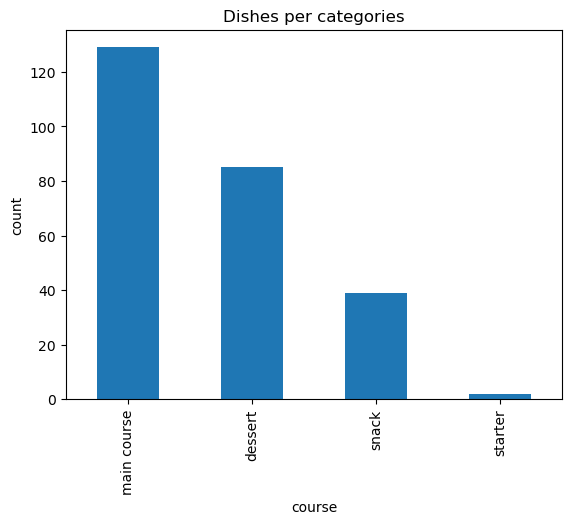

In [42]:
dish_category.plot(kind='bar')
plt.title('Dishes per categories')
plt.savefig("dishes_per_cat.png")  # or any name
plt.ylabel('count')

<Axes: >

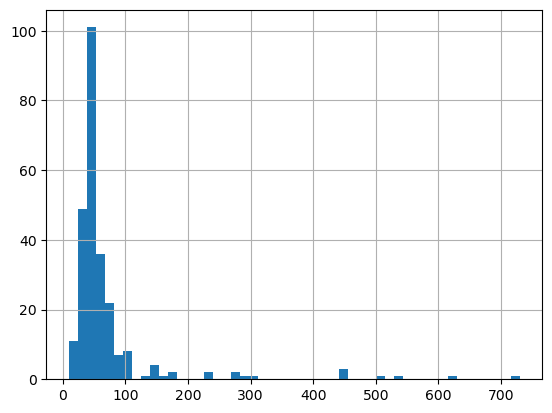

In [46]:
df_clean['total_time'].hist(bins=50)

<Axes: xlabel='cook_time', ylabel='diet'>

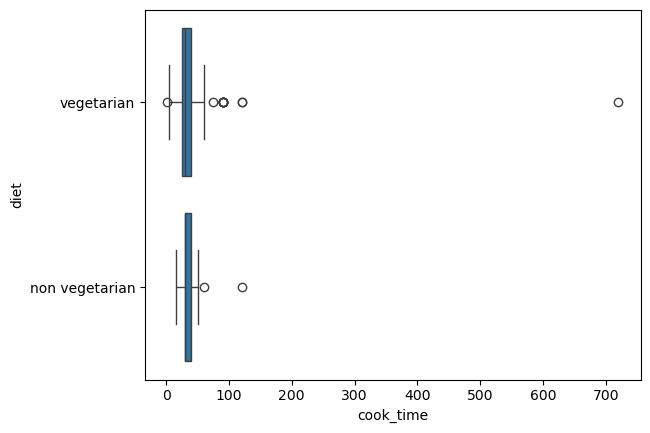

In [48]:
sns.boxplot(data=df_clean, x='cook_time', y='diet')

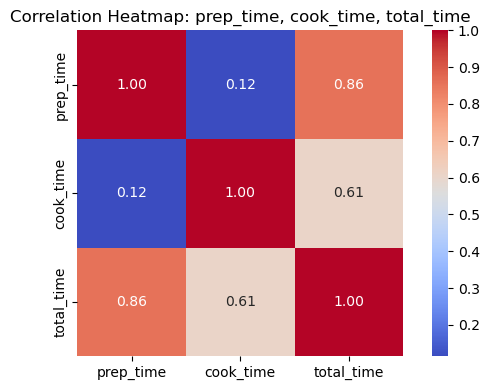

In [369]:
numeric_cols = ['prep_time', 'cook_time', 'total_time']
corr_matrix = df_clean[numeric_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap: prep_time, cook_time, total_time')
plt.tight_layout()
plt.show()

In [373]:
df_clean[df_clean['ingredients'].str.contains('rice', case=False)]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,time-category
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10.0,40.0,sweet,dessert,Unknown,Unknown,50.0,Moderate
14,Phirni,"Rice, sugar, nuts",vegetarian,30.0,20.0,sweet,dessert,Odisha,East,50.0,Moderate
31,Pithe,"Rice flour, wheat flour",vegetarian,15.0,35.0,sweet,dessert,Assam,North East,50.0,Moderate
36,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10.0,50.0,sweet,dessert,West Bengal,East,60.0,Moderate
37,Ariselu,"Rice flour, jaggery, ghee",vegetarian,15.0,75.0,sweet,dessert,Andhra Pradesh,South,90.0,Moderate
42,Gavvalu,"Rice flour, sugar, salt, ghee, semolina",vegetarian,10.0,30.0,sweet,dessert,Andhra Pradesh,South,40.0,Quick
44,Kuzhi paniyaram,"Black lentils, rice",vegetarian,10.0,20.0,sweet,dessert,Kerala,South,30.0,Quick
47,Palathalikalu,"Rice flour, milk",vegetarian,10.0,25.0,sweet,dessert,Andhra Pradesh,South,35.0,Quick
49,Pongal,"Rice, jaggery, cashews, ghee",vegetarian,5.0,20.0,sweet,dessert,Tamil Nadu,South,25.0,Quick
50,Pootharekulu,"Rice flour, powdered sugar, ghee",vegetarian,10.0,60.0,sweet,dessert,Andhra Pradesh,South,70.0,Moderate


In [401]:
spicy_counts = df_clean[df_clean['flavor_profile'] == 'spicy'].groupby('region').size().sort_values()
print(spicy_counts)

region
Central        2
East           6
Unknown        6
North East    13
South         30
North         35
West          41
dtype: int64


In [44]:
spicy_counts.plot(kind='bar', color='tomato', rot=45)
plt.title('Spicy Dishes per Region')
plt.xlabel('Region')
plt.ylabel('Number of Spicy Dishes')
plt.tight_layout()
plt.savefig("spicy_dishes_per_region.png")  # or any name
plt.show()

NameError: name 'spicy_counts' is not defined